In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import missingno as mi
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.anova import anova_lm
import random
from statsmodels.formula.api import ols
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import statistics
from sklearn.metrics import confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap
from datetime import date

import pandas as pd
import numpy as np

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex

import re

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import GridSearchCV, KFold

import xgboost as xgb
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

import os

In [5]:
os.chdir('/Users/rctrj/UCD/Winter/BAX 452/Homework/HW4')

In [6]:
os.getcwd()

'/Users/rctrj/UCD/Winter/BAX 452/Homework/HW4'

In [7]:
data = pd.read_csv('assignment4.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model year    398 non-null    int64  
 8   origin        398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


## Max Abs Scaling ##

It make sure that the maximum value in the column is 1. It doesn’t shift or change the center if the data. 

In [76]:
accel = np.asarray(data.loc[:, 'acceleration']).reshape(-1, 1)

In [77]:
from sklearn.preprocessing import MaxAbsScaler

accel_transformed = MaxAbsScaler().fit(accel)
transform_data = accel_transformed.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Max of transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 0.6277455827524719
Standard deviation of transformed data = 0.1110573515158878
Max of transformed data = 1.0


<AxesSubplot:ylabel='Count'>

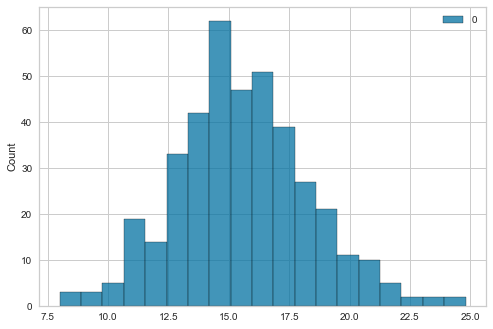

In [36]:
sns.histplot(accel, color = 'blue')

<AxesSubplot:ylabel='Count'>

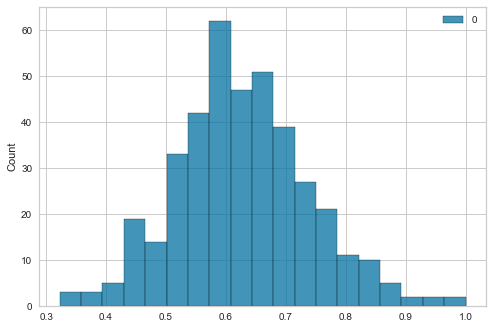

In [37]:
sns.histplot(transform_data, color = 'blue')

## Min Max Scaling ##

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Min Max scaling or is used to scale values such that they range between 0 and 1 after
transformation.

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
accel_transformed = scaler.fit(accel)
transform_data = accel_transformed.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Max of transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 0.45048157453936344
Standard deviation of transformed data = 0.1639418046186915
Max of transformed data = 0.9999999999999999


<AxesSubplot:ylabel='Count'>

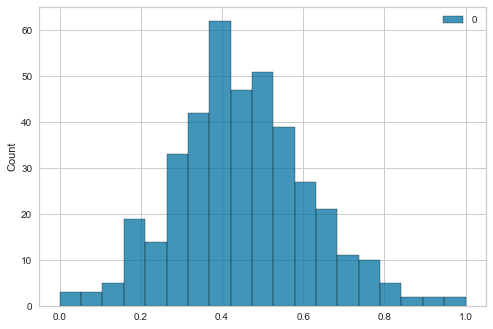

In [39]:
sns.histplot(transform_data, color = 'blue')

## Normalizer ##

Normalizer transforms each row of the data set so and resamples it to transform it to unit norm. 

In [43]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer(norm='l1').fit(accel)
transform_data = transformer.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 1.0
Standard deviation of transformed data = 0.0
Maxof transformed data = 1.0


<AxesSubplot:ylabel='Count'>

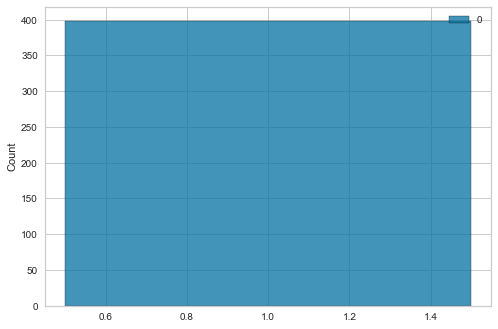

In [44]:
sns.histplot(transform_data, color = 'blue')

In [45]:
### l2 norm ###

from sklearn.preprocessing import Normalizer

transformer = Normalizer(norm='l2').fit(accel)
transform_data = transformer.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 1.0
Standard deviation of transformed data = 0.0
Maxof transformed data = 1.0


<AxesSubplot:ylabel='Count'>

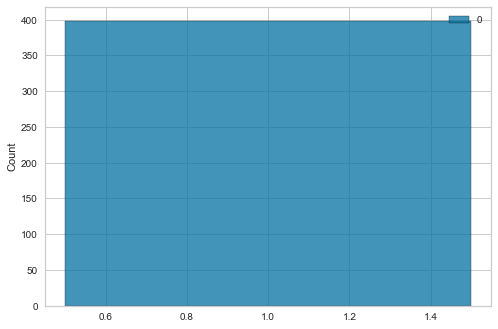

In [46]:
sns.histplot(transform_data, color = 'blue')

In [48]:
### max norm ###

from sklearn.preprocessing import Normalizer

transformer = Normalizer(norm='max').fit(accel)
transform_data = transformer.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 1.0
Standard deviation of transformed data = 0.0
Maxof transformed data = 1.0


<AxesSubplot:ylabel='Count'>

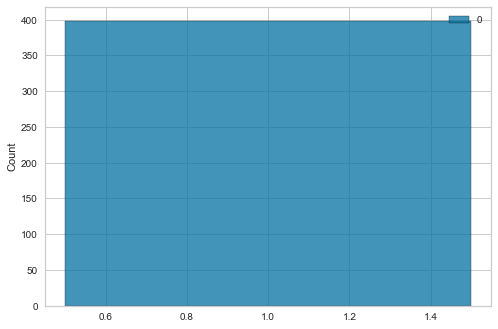

In [49]:
sns.histplot(transform_data, color = 'blue')

## PowerTransformer Yeo-Johnson ##

This scaling applies a power transformation to the feature to make them mode like gaussian distribution.

In [50]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
transform = pt.fit(accel)
transform_data = pt.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = -1.0711699534071861e-15
Standard deviation of transformed data = 0.9999999999999999
Maxof transformed data = 3.043039377098009


<AxesSubplot:ylabel='Count'>

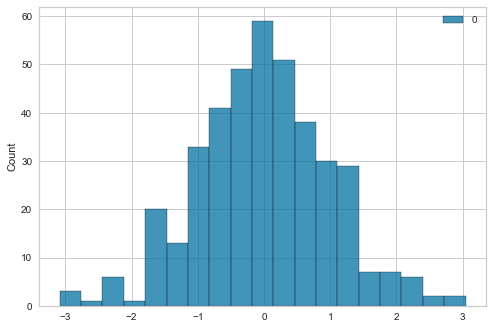

In [51]:
sns.histplot(transform_data, color = 'blue')

In [52]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('box-cox')
transform = pt.fit(accel)
transform_data = pt.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = -5.177321441468066e-16
Standard deviation of transformed data = 1.0
Maxof transformed data = 3.0468887798916353


## Quantile Tranformation Normal ##

Quantile-Transformation normal is another technique to trasnform a data set to normal distribution. 

In [63]:
from sklearn.preprocessing import quantile_transform

transform_data = quantile_transform(accel, n_quantiles=398, random_state=1, copy=True, output_distribution='normal')

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 0.0008961428054773563
Standard deviation of transformed data = 1.050687337227496
Maxof transformed data = 5.19933758270342


<AxesSubplot:ylabel='Count'>

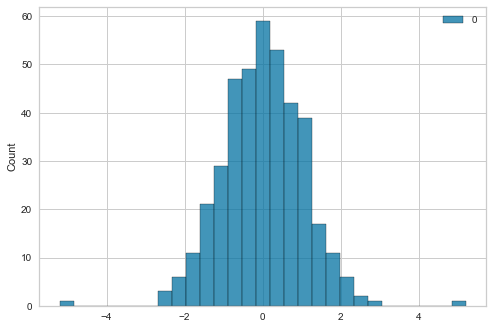

In [64]:
sns.histplot(transform_data, color = 'blue')

## Quantile Tranform Uniform ##

This technique is used to tranform a data set to uniform distribution. 

In [65]:
from sklearn.preprocessing import quantile_transform

transform_data = quantile_transform(accel, n_quantiles=398, random_state=1, copy=True, output_distribution='uniform')

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 0.5001329063453287
Standard deviation of transformed data = 0.28934184755702674
Maxof transformed data = 1.0


<AxesSubplot:ylabel='Count'>

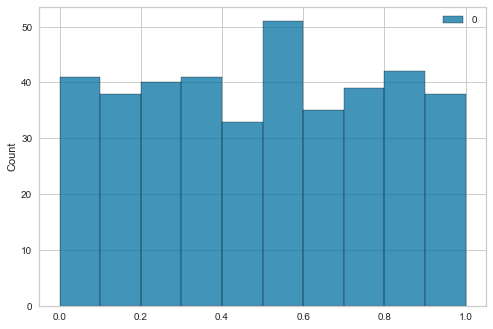

In [66]:
sns.histplot(transform_data, color = 'blue')

## Robust Scaler ##

This scaling technique removes the outliers first and then applies standard scaler to scale the data set. 

In [67]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler(with_centering = True, with_scaling = True).fit(accel)
transform_data = transformer.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Maxof transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = 0.020325508137703445
Standard deviation of transformed data = 0.8221559156997077
Maxof transformed data = 2.776119402985078


<AxesSubplot:ylabel='Count'>

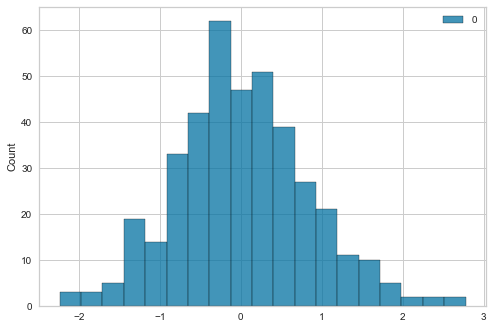

In [68]:
sns.histplot(transform_data, color = 'blue')

## Standard Scaler ##

This is the most commonly used scaling technique. It subtracts mean from each data point and then scale it to unit variance. 

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(accel)
transform_data = scaler.transform(accel)

print("Mean of original data = {}".format(accel.mean()))
print("Standard deviation of original data = {}".format(accel.std()))
print("Max of original data = {}".format(accel.max()))
print("\n")
print("Mean of transformed data = {}".format(transform_data.mean()))
print("Standard deviation of transformed data = {}".format(transform_data.std()))
print("Max of transformed data = {}".format(transform_data.max()))

Mean of original data = 15.568090452261307
Standard deviation of original data = 2.7542223175940177
Max of original data = 24.8


Mean of transformed data = -2.6779248835179653e-16
Standard deviation of transformed data = 0.9999999999999998
Maxof transformed data = 3.351911531892361


<AxesSubplot:ylabel='Count'>

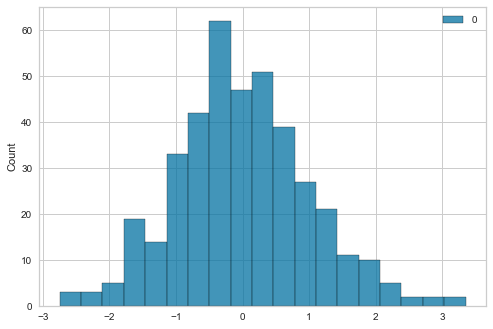

In [74]:
sns.histplot(transform_data, color = 'blue')

In [80]:
os.getcwd()

'/Users/rctrj/UCD/Winter/BAX 452/Homework/HW4'